# CIF

The `Cif` class generates an object for each `.cif` file. Each object can

- compute the coordination numbers for each site label using four methods
- compute bond fractions and bond counts at each site within the specified cutoff radius or based on -coordination number geometry
- categorize atomic mixing at bond-pair and file levels
- list all possible bond and label pairs derived from the formula
- generate a unit cell and a supercell by applying ±1 shifts
- parse formulas, structures, tags, space group names, supercell sizes, and elements


You can initialize `Cif` object using a file path to the `.cif` file. Or you can simply use the example `.cif` provided in `cifkit` below.

In `cifkit` we provide .cif files that can be accessed through `from cifkit import Example` as shown below. For advancuser, these example .cif files are located under `src/cifkit/data` in the package.

In [1]:
from cifkit import Example
from cifkit import Cif

# Initialize with the example file provided
cif = Cif(Example.GdSb_file_path)

# Print attributes
print("File name:", cif.file_name)
print("Formula:", cif.formula)
print("Unique element:", cif.unique_elements)

File name: GdSb.cif
Formula: GdSb
Unique element: {'Gd', 'Sb'}


## Get instant properties - parsed information

The `Cif` class provides a set of accessible properties that can be accessed. Each object is initialized with the `file_path` to the `.cif` file.

In [2]:
from cifkit import Cif, Example
import json

# Utility function for printing dictionary
def prettify_dict(dict_data):
  return json.dumps(dict_data, indent=4)

# Initialize
cif = Cif(Example.GdSb_file_path)

# Print instantly available properties
print("Formula:", cif.formula)
print("Structure:", cif.structure)
print("Unique elements:", cif.unique_elements)
print("Unitcell lengths:", cif.unitcell_lengths)
print("Unitcell angles:", cif.unitcell_angles)
print("Site labels:", cif.site_labels)
print("Weight:", cif.weight)
print("Atomic mixing type:", cif.site_mixing_type)
print("Space group number:", cif.space_group_number)
print("Space group number:", cif.space_group_name)
print("Composition type:", cif.composition_type) # 3 -> Ternary
print("Tag:", cif.tag)
print("Atom_site_info:", prettify_dict(cif.atom_site_info))
print("Wyckoff_symbol of Gd:", cif.atom_site_info["Gd"]["wyckoff_symbol"])

Formula: GdSb
Structure: NaCl
Unique elements: {'Gd', 'Sb'}
Unitcell lengths: [6.21, 6.21, 6.21]
Unitcell angles: [1.5708, 1.5708, 1.5708]
Site labels: ['Sb', 'Gd']
Weight: 279.0
Atomic mixing type: full_occupancy
Space group number: 225
Space group number: Fm-3m
Composition type: 2
Tag: rt
Atom_site_info: {
    "Sb": {
        "element": "Sb",
        "site_occupancy": 1.0,
        "x_frac_coord": 0.5,
        "y_frac_coord": 0.5,
        "z_frac_coord": 0.5,
        "symmetry_multiplicity": 4,
        "wyckoff_symbol": "b"
    },
    "Gd": {
        "element": "Gd",
        "site_occupancy": 1.0,
        "x_frac_coord": 0.0,
        "y_frac_coord": 0.0,
        "z_frac_coord": 0.0,
        "symmetry_multiplicity": 4,
        "wyckoff_symbol": "a"
    }
}
Wyckoff_symbol of Gd: a


### How tag is parsed

Tag is parsed from the third line of each `.cif` file. Some databases such as Pearson's Crystal Data offers tags for each file.



## Get instant properties - bond pairs

- The following code returns all possible element and site pairs from the formula in the .cif file.
- The `mixing_info_per_label_pair` and `mixing_info_per_label_pair_sorted_by_mendeleev` return site mixing information at the pair level.

In [3]:
from cifkit import Cif, Example

# Initialize
cif = Cif(Example.GdSb_file_path)

# Utility function for printing a set of tuples
def print_tuples(tuples):
  for pair in tuples:
    print(f"({pair[0]}, {pair[1]})")

# All bond pairs
print("\nAll possible bond pairs:")
print_tuples(cif.bond_pairs)

print("\nAll possible bond pairs sorted by Mendeleev:")
print_tuples(cif.bond_pairs_sorted_by_mendeleev)

# All label pairs
print("\nAll possible label pairs from the formula:")
print_tuples(cif.site_label_pairs)

print("\nAll possible label pairs sorted by Mendeleev:")
print_tuples(cif.site_label_pairs_sorted_by_mendeleev)

# Atomic mixing per pair
print("\nAtomic mixing per label pair:")
print((cif.mixing_info_per_label_pair))

print("\nAtomic mixing per label pair sorted by Mendeleev:")
print(cif.mixing_info_per_label_pair_sorted_by_mendeleev)



All possible bond pairs:
(Sb, Sb)
(Gd, Gd)
(Gd, Sb)

All possible bond pairs sorted by Mendeleev:
(Sb, Sb)
(Gd, Gd)
(Gd, Sb)

All possible label pairs from the formula:
(Sb, Sb)
(Gd, Gd)
(Gd, Sb)

All possible label pairs sorted by Mendeleev:
(Sb, Sb)
(Gd, Gd)
(Gd, Sb)

Atomic mixing per label pair:
{('Sb', 'Sb'): 'full_occupancy', ('Gd', 'Gd'): 'full_occupancy', ('Gd', 'Sb'): 'full_occupancy'}

Atomic mixing per label pair sorted by Mendeleev:
{('Sb', 'Sb'): 'full_occupancy', ('Gd', 'Gd'): 'full_occupancy', ('Gd', 'Sb'): 'full_occupancy'}


### How atomic mixing type is defined

Each bonding pair or each file is defined with one of four atomic mixing categories:

- **Full occupancy** is assigned when a single atomic site occupies the fractional coordinate with an occupancy value of 1.
- **Full occupancy with atomic mixing** is assigned when multiple atomic sites collectively occupy the fractional coordinate to a sum of 1.
- **Deficiency without atomic mixing** is assigned when a single atomic site occupying the fractional coordinate with a sum less than 1.
- **Deficiency with atomic mixing** is assigned when multiple atomic sites occupy the fractional coordinate with a sum less than 1.

## Get computed properties - nearest connections per site

This section involves computing distances between atoms. Unlike instant properties, these properties may require extensive computation, typically ranging from 1-2 seconds for larger supercells containing more than 3,000 atoms.

These properties are loaded lazily, meaning accessing any of the properties will execute `compute_connections()` internally. This function will then compute `connections`, providing all the nearest neighbors for each site.

There are options in the `Cif` class to use either the `by_d_min_method` or `by_best_methods`. Please refer to the `README.md` for complete documentation.


In [10]:
def print_connected_points(all_labels_connections):
    """
    Utility function for printing connections per site label
    """
    for label, connections in all_labels_connections.items():
        print(f"\nAtom site {label}:")
        for (
            connected_label,
            dist,
            coords_1,
            coords_2,
        ) in connections:
            print(f"{connected_label} {dist} {coords_1}, {coords_2}")

In [11]:
# Compute CN connections
cif.compute_CN()

# Print CN Connections
print("\nFind CN_connections_by_min_dist_method:")
print_connected_points(cif.CN_connections_by_min_dist_method)

print("\nFind CN_connections_by_best_methods:")
print_connected_points(cif.CN_connections_by_best_methods)


Find CN_connections_by_min_dist_method:

Atom site Sb:
Gd 3.105 [6.21, -0.0, 3.105], [3.105, -0.0, 3.105]
Gd 3.105 [6.21, -0.0, 3.105], [6.21, -0.0, 6.21]
Gd 3.105 [6.21, -0.0, 3.105], [6.21, -3.105, 3.105]
Gd 3.105 [6.21, -0.0, 3.105], [6.21, 0.0, 0.0]
Gd 3.105 [6.21, -0.0, 3.105], [6.21, 3.105, 3.105]
Gd 3.105 [6.21, -0.0, 3.105], [9.315, -0.0, 3.105]

Atom site Gd:
Sb 3.105 [3.105, -0.0, 3.105], [3.105, -3.105, 3.105]
Sb 3.105 [3.105, -0.0, 3.105], [3.105, 0.0, 0.0]
Sb 3.105 [3.105, -0.0, 3.105], [6.21, -0.0, 3.105]
Sb 3.105 [3.105, -0.0, 3.105], [3.105, 3.105, 3.105]
Sb 3.105 [3.105, -0.0, 3.105], [3.105, -0.0, 6.21]
Sb 3.105 [3.105, -0.0, 3.105], [-0.0, -0.0, 3.105]

Find CN_connections_by_best_methods:

Atom site Sb:
Gd 3.105 [6.21, -0.0, 3.105], [3.105, -0.0, 3.105]
Gd 3.105 [6.21, -0.0, 3.105], [6.21, -0.0, 6.21]
Gd 3.105 [6.21, -0.0, 3.105], [6.21, -3.105, 3.105]
Gd 3.105 [6.21, -0.0, 3.105], [6.21, 0.0, 0.0]
Gd 3.105 [6.21, -0.0, 3.105], [6.21, 3.105, 3.105]
Gd 3.105 [6.21, 

## Get computed properties - distances

You can get the shortest distance from each site label or the shortest distance for each possible bond pair.

In [5]:
print("Shortest distance:", cif.shortest_distance)
print("Shortest bond pair distances:", cif.shortest_bond_pair_distance)
print("Shortest site pair distances:", cif.shortest_site_pair_distance)

Shortest distance: 3.105
Shortest bond pair distances: {('Gd', 'Sb'): 3.105, ('Gd', 'Gd'): 4.391, ('Sb', 'Sb'): 4.391}
Shortest site pair distances: {'Sb': ('Gd', 3.105), 'Gd': ('Sb', 3.105)}


In [6]:
# Bond counts
print("\nCN_bond_count_by_min_dist_method:")
print(cif.CN_bond_count_by_min_dist_method)

print("\nCN_bond_count_by_min_dist_method_sorted_by_mendeleev:")
print(cif.CN_bond_count_by_min_dist_method_sorted_by_mendeleev)

print("\nCN_bond_count_by_best_methods:")
print(cif.CN_bond_count_by_best_methods)

print("\nCN_bond_count_by_best_methods_sorted_by_mendeleev:")
print(cif.CN_bond_count_by_best_methods_sorted_by_mendeleev)

# Bond fractions
print("\nCN_bond_fractions_by_min_dist_method:")
print(cif.CN_bond_fractions_by_min_dist_method)

print("\nCN_bond_fractions_by_min_dist_method_sorted_by_mendeleev:")
print(cif.CN_bond_fractions_by_min_dist_method_sorted_by_mendeleev)

print("\nCN_bond_fractions_by_best_methods:")
print(cif.CN_bond_fractions_by_best_methods)

print("\nCN_bond_fractions_by_best_methods_sorted_by_mendeleev:")
print(cif.CN_bond_fractions_by_best_methods_sorted_by_mendeleev)

# Unique coordination numbers
print("\nCN_unique_values_by_min_dist_method")
print(cif.CN_unique_values_by_min_dist_method)

print("\nCN_unique_values_by_best_methods")
print(cif.CN_unique_values_by_best_methods)

# Average coordination number
print("\nCN_avg_by_min_dist_method:")
print(cif.CN_avg_by_min_dist_method)

print("\nCN_avg_by_best_methods: ")
print(cif.CN_avg_by_best_methods)

# Min coordination number
print("\nCN_max_by_min_dist_method:")
print(cif.CN_max_by_min_dist_method)

print("\nCN_max_by_best_methods:")
print(cif.CN_max_by_best_methods)

# Max coordination number
print("\nCN_min_by_min_dist_method:")
print(cif.CN_min_by_min_dist_method)

print("\nCN_min_by_best_methods:")
print(cif.CN_min_by_best_methods)


CN_bond_count_by_min_dist_method:
{'Sb': {('Gd', 'Sb'): 6}, 'Gd': {('Gd', 'Sb'): 6}}

CN_bond_count_by_min_dist_method_sorted_by_mendeleev:
{'Sb': {('Gd', 'Sb'): 6}, 'Gd': {('Gd', 'Sb'): 6}}

CN_bond_count_by_best_methods:
{'Sb': {('Gd', 'Sb'): 6}, 'Gd': {('Gd', 'Sb'): 6}}

CN_bond_count_by_best_methods_sorted_by_mendeleev:
{'Sb': {('Gd', 'Sb'): 6}, 'Gd': {('Gd', 'Sb'): 6}}

CN_bond_fractions_by_min_dist_method:
{('Gd', 'Sb'): 1.0}

CN_bond_fractions_by_min_dist_method_sorted_by_mendeleev:
{('Gd', 'Sb'): 1.0}

CN_bond_fractions_by_best_methods:
{('Gd', 'Sb'): 1.0}

CN_bond_fractions_by_best_methods_sorted_by_mendeleev:
{('Gd', 'Sb'): 1.0}

CN_unique_values_by_min_dist_method
{6}

CN_unique_values_by_best_methods
{6}

CN_avg_by_min_dist_method:
6.0

CN_avg_by_best_methods: 
6.0

CN_max_by_min_dist_method:
6

CN_max_by_best_methods:
6

CN_min_by_min_dist_method:
6

CN_min_by_best_methods:
6


## Draw polyhedrons

You may use `Jupyter` notebook or a python script to execute the following to generate and save a polyhedron generated from each site and the nearest neighbor atoms are determined from the coordination number geometry.


Site labels: ['Sb', 'Gd']


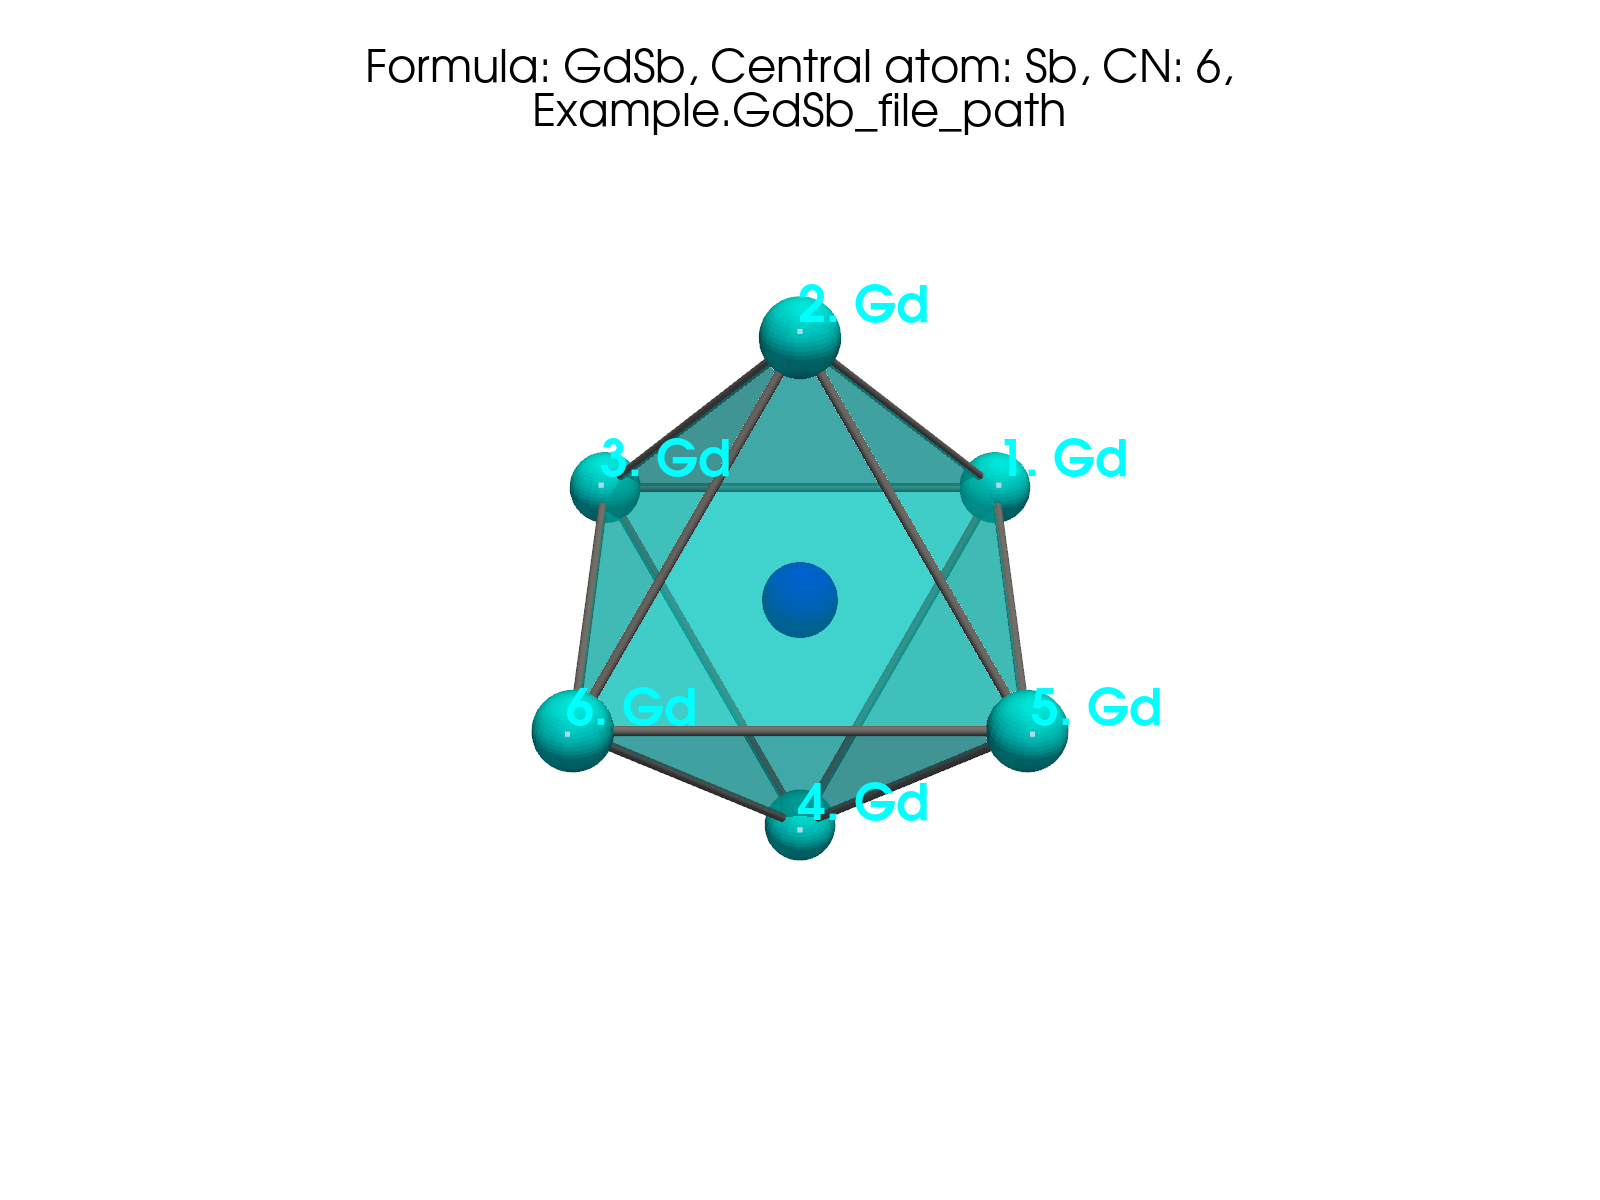

In [7]:
from cifkit import Cif, Example
import warnings
warnings.filterwarnings('ignore') # For Jupyter Notebook only


# Enter site labels. you can get site labels using cif.labels
print("Site labels:", cif.site_labels)

# Plot
cif.plot_polyhedron("Sb", is_displayed=True)